<a href="https://colab.research.google.com/github/sroy-10/genai/blob/main/LangChain/LangChain_v0_3_Prompts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r requirements.txt -q

In [ ]:
import langchain
import os
from dotenv import load_dotenv

load_dotenv("var.env")
print(langchain.__version__) # 0.3.25

In [ ]:
from langchain_openai import AzureChatOpenAI

os.environ["AZURE_OPENAI_API_KEY"] = os.environ["AZ_API_KEY"]
os.environ["AZURE_OPENAI_ENDPOINT"] = os.getenv("AZ_BASE") # https://YOUR-ENDPOINT.openai.azure.com/

model = AzureChatOpenAI(
    azure_deployment=os.getenv("AZ_MODEL"),
    api_version=os.getenv("AZ_API_VERSION"),
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

## Prompt

In [ ]:
from langchain_core.prompts import PromptTemplate
import random

template = PromptTemplate(template="""
Please summarize the research paper titled "{paper_input}" with the following
specifications:

Explanation Style: {style_input}
Explanation Length: {length_input}

1. Mathematical Details:
- Include relevant mathematical equations if present in the paper.
- Explain the mathematical concepts using simple, intuitive code snippets where applicable.

2. Analogies:
- Use relatable analogies to simplify complex ideas.

If certain information is not available in the paper, respond with: "Insufficient information available" instead of guessing.
Ensure the summary is clear, accurate, and aligned with the provided style and length.""",
                          input_variables=["paper_input", "style_input", "length_input"],
                          validate_template=True,
                        )

paper_input = random.choice(["Attention Is All You Need", "BERT: Pre-training of Deep Bidirectional Transformers", "GPT-3: Language Models are Few-Shot Learners", "Diffusion Models Beat GANs on Image Synthesis"])
style_input =  random.choice(["Beginner-Friendly", "Technical", "Code-Oriented", "Mathematical"])
length_input =  random.choice(["Short (1-2 paragraphs)", "Medium (3-5 paragraphs)", "Long (detailed explanation)"])

prompt = template.invoke({
    "paper_input": paper_input,
    "style_input": style_input,
    "length_input": length_input,
})

result = model.invoke(prompt)

print("Paper Input → ", paper_input)
print("Style Input → ", style_input)
print("Length Input → ", length_input)

print("\nAI Answer:\n\n")
print(result.content)

Output:

```
Paper Input →  GPT-3: Language Models are Few-Shot Learners
Style Input →  Beginner-Friendly
Length Input →  Short (1-2 paragraphs)

AI Answer:


The research paper "GPT-3: Language Models are Few-Shot Learners" introduces GPT-3, a powerful language model developed by OpenAI. GPT-3 is designed to understand and generate human-like text by learning from a vast amount of data. One of its standout features is its ability to perform tasks with minimal examples, known as few-shot learning. This means that instead of needing thousands of examples to learn a new task, GPT-3 can often understand and perform tasks with just a few examples or even none at all.

Mathematically, GPT-3 is based on a transformer architecture, which uses attention mechanisms to weigh the importance of different words in a sentence. Imagine trying to understand a story by focusing on the most important parts rather than reading every single word carefully. This is similar to how attention works in GPT-3. The model uses a large number of parameters (175 billion, to be exact) to capture the nuances of language. While the paper includes complex equations to describe these processes, a simple analogy is thinking of GPT-3 as a very experienced chef who can cook a new dish by just tasting a few ingredients, rather than needing the entire recipe.
```

<b>Generate the prompt and save it in a file</b>

In [ ]:
from langchain_core.prompts import PromptTemplate
template = PromptTemplate(
    template = """
Please summarize the research paper titled "{paper_input}" with the following
specifications:

Explanation Style: {style_input}
Explanation Length: {length_input}

1. Mathematical Details:
- Include relevant mathematical equations if present in the paper.
- Explain the mathematical concepts using simple, intuitive code snippets where applicable.

2. Analogies:
- Use relatable analogies to simplify complex ideas.

If certain information is not available in the paper, respond with: "Insufficient information available" instead of guessing.
Ensure the summary is clear, accurate, and aligned with the provided style and length.""",
    input_variables=["paper_input", "style_input", "length_input"],
    validate_template=True,
)

template.save("prompt_template.json")


Load the prompt json file

In [ ]:
from langchain_core.prompts import PromptTemplate, load_prompt

template = load_prompt("prompt_template.json")
prompt = template.invoke({
    "paper_input": paper_input,
    "style_input": style_input,
    "length_input": length_input,
})
model.invoke(prompt).content

Output

```
The research paper "GPT-3: Language Models are Few-Shot Learners" introduces GPT-3, a powerful language model developed by OpenAI. GPT-3 is designed to understand and generate human-like text by learning from a vast amount of data. One of its standout features is its ability to perform tasks with minimal examples, known as few-shot learning. This means that GPT-3 can understand and complete tasks with just a few examples, or even none at all, which is similar to how humans can often learn new tasks by seeing just a few examples.

Mathematically, GPT-3 is based on a transformer architecture, which uses attention mechanisms to process and generate text. The model is trained using a large dataset and a process called unsupervised learning, where it predicts the next word in a sentence. An intuitive way to think about this is like teaching a child to complete sentences by showing them many examples of sentences. The child learns patterns and can then predict what comes next in a new sentence. In code, this might look like a function that takes a sequence of words and predicts the next word based on learned patterns. However, the paper does not provide specific equations or code snippets, so further mathematical details are not available.
```

We are invoking 2 times. We can do a single calling using `Chains`.

In [ ]:
chains = template | model
result = chains.invoke(
    {
    "paper_input": paper_input,
    "style_input": style_input,
    "length_input": length_input,
})
result.content

Output

```
The research paper "GPT-3: Language Models are Few-Shot Learners" introduces GPT-3, a powerful language model developed by OpenAI. GPT-3 is designed to understand and generate human-like text by learning from a vast amount of data. One of its standout features is its ability to perform tasks with minimal examples, known as few-shot learning. This means that GPT-3 can understand and complete tasks with just a few examples, or even none at all, which is similar to how humans can often learn new tasks by seeing just a few examples.

Mathematically, GPT-3 is based on a transformer architecture, which uses attention mechanisms to process and generate text. The model is trained using a large dataset and a process called unsupervised learning, where it predicts the next word in a sentence. An intuitive way to think about this is like teaching a child to complete sentences by showing them many books and asking them to guess the next word. The model's ability to generalize from limited examples is akin to how a person might learn to play a new game by watching a few rounds rather than reading the entire rulebook. However, the paper does not provide specific mathematical equations in a beginner-friendly format, so further mathematical details are not included here.
```

## Chat Bot

In [ ]:
chat_history = []

while True:
    user_input = input("User → ")
    if user_input.lower() == "exit":
        break
    chat_history.append(("human", user_input))
    result = model.invoke(chat_history)
    print("AI → ", result.content)
    chat_history.append(("system", result.content))

Output

```
User → Which is bigger 2, 3?
AI →  The number 3 is bigger than the number 2.
User → double the bigger number
AI →  Doubling the bigger number, which is 3, gives you 6.
User → exit
```

Langchain has three kinds of messages:
- System Message
- Human Message
- AI Message

In [ ]:
from langchain_core.messages import SystemMessage, AIMessage, HumanMessage

chat_history = [SystemMessage("You are helpful assistant!")]

while True:
    user_input = input("User → ")
    if user_input.lower() == "exit":
        break

    chat_history.append(HumanMessage(user_input))
    result = model.invoke(chat_history)

    print("AI → ", result.content)
    chat_history.append(AIMessage(result.content))

print("\n\nCHAT HISTORY:\n\n", chat_history)

Output

```
User → Which is smaller 2, 3?
AI →  The number 2 is smaller than the number 3.
User → double the bigger number
AI →  Doubling the bigger number, which is 3, gives you \(3 \times 2 = 6\).
User → exit


CHAT HISTORY:

 [SystemMessage(content='You are helpful assistant!', additional_kwargs={}, response_metadata={}), HumanMessage(content='Which is smaller 2, 3?', additional_kwargs={}, response_metadata={}), AIMessage(content='The number 2 is smaller than the number 3.', additional_kwargs={}, response_metadata={}), HumanMessage(content='double the bigger number', additional_kwargs={}, response_metadata={}), AIMessage(content='Doubling the bigger number, which is 3, gives you \\(3 \\times 2 = 6\\).', additional_kwargs={}, response_metadata={})]
```

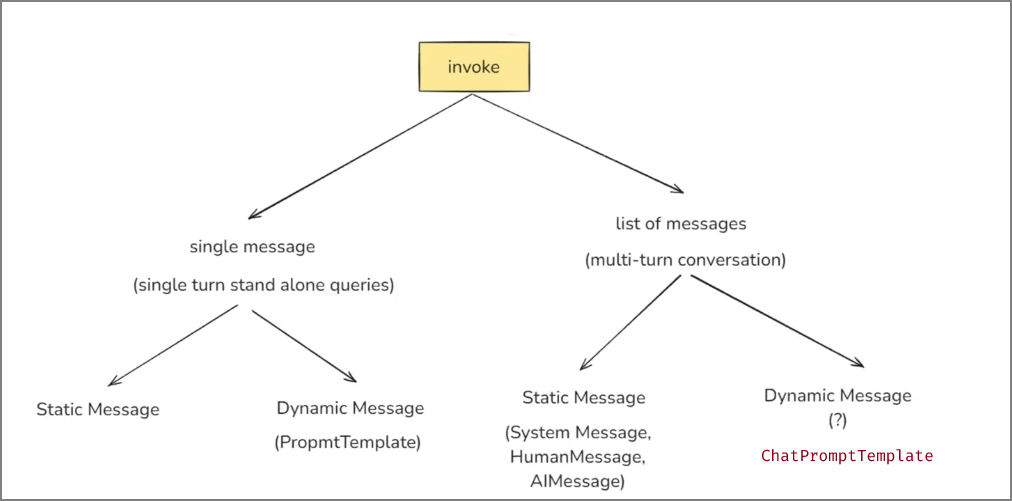

## ChatPromptTemplate

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage, HumanMessage

chat_template = ChatPromptTemplate([
                    SystemMessage(content = "You are a helpful {domain} expert"),
                    HumanMessage(content = "Explain is simple terms, what is {topic}?")
                  ]
                  )

prompt = chat_template.invoke(
            {
              "domain": "cricket",
              "topic": "Dusra"
            }
          )
prompt

Output
```
ChatPromptValue(messages=[SystemMessage(content='You are a helpful {domain} expert', additional_kwargs={}, response_metadata={}), HumanMessage(content='Explain is simple terms, what is {topic}?', additional_kwargs={}, response_metadata={})])
```

`Note:` the values in the f string are not getting replaced

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate(
    [
        ("system", "You are a helpful {domain} expert"),
        ("human", "Explain is simple terms, what is {topic}?")
    ]
)

chat_template.invoke(
            {
              "domain": "cricket",
              "topic": "Dusra"
            })

Output:
```
ChatPromptValue(messages=[SystemMessage(content='You are a helpful cricket expert', additional_kwargs={}, response_metadata={}), HumanMessage(content='Explain is simple terms, what is Dusra?', additional_kwargs={}, response_metadata={})])
```

`Note:` the values in the f string are properly getting replaced

## Message Placeholder

A <b>MessagesPlaceholder</b> in LangChain is a special placeholder used inside a <b>ChatPromptTemplate</b> to dynamically insert chat history or a list of messages at runtime.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

chat_template = ChatPromptTemplate([
    ("system", "You are a helpful customer support agent"),
    MessagesPlaceholder(variable_name = "chat_history"),
    ("human", "{query}")
])

chat_history = []

with open("chat_history.txt", "r") as f:
  chat_history.extend(f.readlines())

prompt = chat_template.invoke({
    "chat_history": chat_history,
    "query": "Where is my refund"
})

prompt

# ChatPromptValue(messages=[SystemMessage(content='You are a helpful customer support agent', additional_kwargs={}, response_metadata={}), HumanMessage(content='HumanMessage(content="I want to request a refund for my order #12345.")\n', additional_kwargs={}, response_metadata={}), HumanMessage(content='AIMessage(content="Your refund request for order #12345 has been initiated. It will be processed in 3-5 business days.")', additional_kwargs={}, response_metadata={}), HumanMessage(content='Where is my refund', additional_kwargs={}, response_metadata={})])

Output:
```
ChatPromptValue(messages=[SystemMessage(content='You are a helpful customer support agent', additional_kwargs={}, response_metadata={}), HumanMessage(content='HumanMessage(content="I want to request a refund for my order #12345.")\n', additional_kwargs={}, response_metadata={}), HumanMessage(content='AIMessage(content="Your refund request for order #12345 has been initiated. It will be processed in 3-5 business days.")', additional_kwargs={}, response_metadata={}), HumanMessage(content='Where is my refund', additional_kwargs={}, response_metadata={})])
```